In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats
from scipy.optimize import curve_fit
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import pandas as pd

%matplotlib inline


1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [2]:
def f(X, Y):
    return ((4-2.1*(X**2) + (X**4)/3)*(X**2) + X*Y + (4*(Y**2) - 4)*(Y**2))

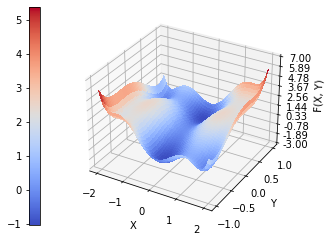

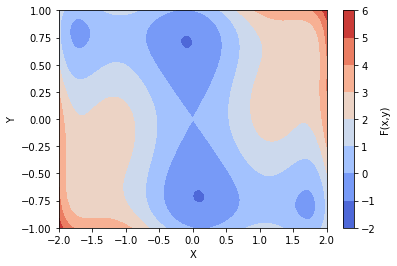

In [3]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-3, 7)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_ylabel("Y")
ax.set_xlabel("X")
ax.set_zlabel("F(X, Y)")

# Add a color bar which maps values to colors.
fig.colorbar(surf, location = "left")

plt.show()

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, cmap=cm.coolwarm, antialiased=False)
fig.colorbar(cp, location = "right", label="F(x,y)")
ax.set_ylabel("Y")
ax.set_xlabel("X")





plt.show()



In [4]:
def func(X):
    return ((4-2.1*(X[0]**2) + (X[0]**4)/3)*(X[0]**2) + X[0]*X[1] + (4*(X[1]**2) - 4)*(X[1]**2))

x1 = np.array([0.2,-0.7])
solution1 = optimize.minimize(func,x1)
x2 = np.array([-0.2,0.7])
solution2 = optimize.minimize(func,x2)

print("Global minima 1 :", solution1.x)
print("Function value in gm1 : ", func(solution1.x))

print("Global minima 2 : ", solution2.x)
print("Function value in gm2 : ", func(solution2.x))



Global minima 1 : [ 0.089842   -0.71265638]
Function value in gm1 :  -1.0316284534898716
Global minima 2 :  [-0.08984201  0.71265636]
Function value in gm2 :  -1.0316284534898645


For initial guess of (0,0) we get an error evaluation of (0,0) minimum.

In [5]:
x0 = np.array([0,0])
solution2 = optimize.minimize(func,x0)
print(solution2)

      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.96046448e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

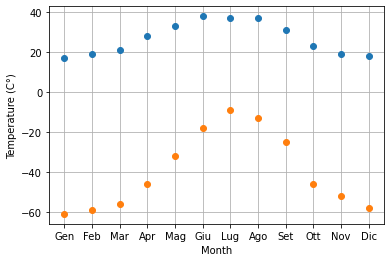

In [6]:
mesi = np.array (["Gen", "Feb", "Mar", "Apr", "Mag", "Giu", "Lug", "Ago", "Set", "Ott", "Nov", "Dic"])
nmesi = np.linspace(1,12,12)
max_t = np.array ([17,19,21,28,33,38,37,37,31,23,19,18])
min_t = np.array ([-61,-59,-56,-46,-32,-18,-9,-13,-25,-46,-52,-58])

fig=plt.figure(figsize=(6, 4))
# plot the data
plt.xlabel("Month")
plt.ylabel("Temperature (C°)")
plt.grid()
plt.plot(mesi, max_t, marker = "o", linestyle="")
plt.plot(mesi, min_t, marker = "o", linestyle="")
plt.show()

Covariance matrix:
 [[1.        0.9643835]
 [0.9643835 1.       ]]


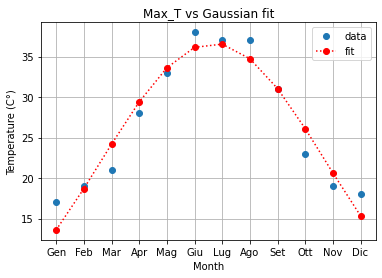

In [7]:
x = nmesi
y = max_t

n = len(x)                         
mean = sum(x*y)/n                  
sigma = sum(y*(x-mean)**2)/n       

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) 

popt,pcov = curve_fit(gaus,x,y)

print("Covariance matrix:\n", np.corrcoef(y,gaus(x,*popt)))

plt.plot(mesi,y,"o", label='data')
plt.plot(mesi,gaus(x,*popt),'ro:',label='fit')
plt.legend()
plt.grid()
plt.title('Max_T vs Gaussian fit')
plt.xlabel("Month")
plt.ylabel('Temperature (C°)')
plt.show()

Covariance matrix:
 [[1.         0.99734982]
 [0.99734982 1.        ]]


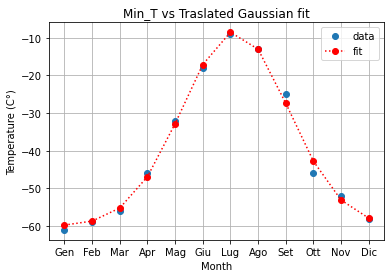

In [8]:
x = nmesi
y = min_t

n = len(x)                         
mean = sum(x*y)/n                  
sigma = sum(y*(x-mean)**2)/n       

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) -60

popt,pcov = curve_fit(gaus,x,y)

print("Covariance matrix:\n", np.corrcoef(y,gaus(x,*popt)))

plt.plot(mesi,y,"o", label='data')
plt.plot(mesi,gaus(x,*popt),'ro:',label='fit')
plt.legend()
plt.grid()
plt.title('Min_T vs Traslated Gaussian fit')
plt.xlabel("Month")
plt.ylabel('Temperature (C°)')
plt.show()

 The two fits are resonable as we can see from images and from cov matrix.

The time offset is virtually the same, the max temperature is always reached in July.

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".


- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [9]:
data = np.load('/home/gaetano/data/residuals_261.pkl', allow_pickle=True)[()]['residuals']
print(data.shape)

# filter the data
offset = -0.1 # estimation of the mean
d = 1 # fix max distance from the mean
nbin = 50
data = np.array([x for x in data if abs(x - offset) < d])
print(data.shape)

(11131,)
(9925,)



gaussian fit

A = 646.74 +- 14.09
mu = -0.09 +- 0.01
sigma = 0.23 +- 0.01


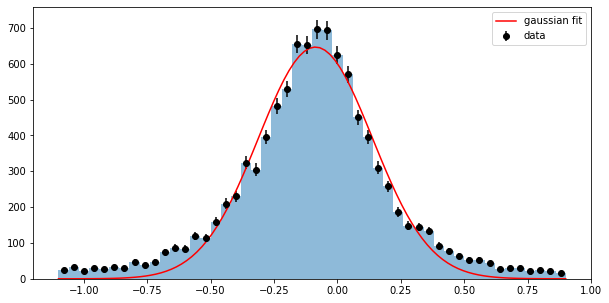

R2 = 0.9725708194691717 
R = 0.9861900524083437

degrees of freedom = 49
chi2 = 782.9509136291022
p-value = 0.0


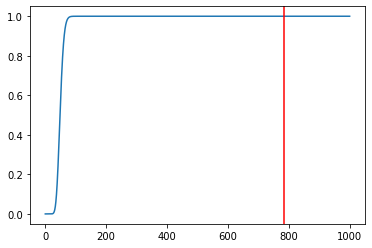

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
bin_counts, bin_edges, patches = ax.hist(data, bins=nbin, alpha=0.5)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
ax.errorbar(bin_centers, bin_counts, yerr=np.sqrt(bin_counts), fmt='o', color='black', label='data')


def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt, pcov = optimize.curve_fit(gaus, bin_centers, bin_counts,
                                bounds=([0, -0.5, 0], [700, 0.5, 1]))
print('\ngaussian fit\n')
print("A = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("mu = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("sigma = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))

x = np.linspace(bin_edges[0], bin_edges[-1], 100)
ax.plot(x, gaus(x, popt[0], popt[1], popt[2]), 'r', label='gaussian fit')
ax.legend()
plt.show()

# goodness-of-fit test
y = bin_counts
sigma_y = np.sqrt(bin_counts)
y_th = gaus(bin_centers, popt[0], popt[1], popt[2])

# correlation coefficient
ssr = np.sum((y - y_th)**2)
tss = np.sum((np.mean(y) - y)**2)
rsq = 1 - ssr / tss
print("R2 =", rsq, "\nR =", np.sqrt(rsq))

# p-value
ndof = len(y) - 1
chi2 = np.sum((y - y_th)**2/sigma_y**2)
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("\ndegrees of freedom =", ndof)
print("chi2 =", chi2)
print("p-value =", pvalue) 

p = np.arange(0, 1000, 0.1)
plt.plot(p, stats.chi2.cdf(p, df=ndof))
plt.axvline(chi2, color='r')
plt.show()


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [11]:
df = pd.read_table("/home/gaetano/data/munich_temperatures_average_with_bad_data.txt", delim_whitespace=True, index_col = 0, names=("Time", "Temp"))

df2 = pd.DataFrame(df[2008.0:2013.0])

df2

,Temp
Time,
2008.00274,-2.94444
2008.00548,-2.66667
2008.00821,-2.66667
2008.01095,-2.00000
2008.01369,-1.94444
...,...
2012.98836,6.88889
2012.99110,7.05556
2012.99384,3.77778


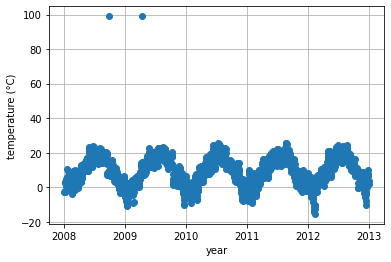

In [12]:
x = df2.index.values
y = df2.Temp.values

plt.plot(x,y,"o")
plt.grid()
plt.xlabel('year')
plt.ylabel('temperature (°C)')
plt.show()

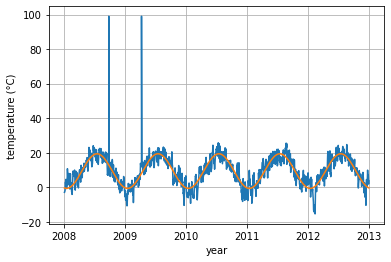

In [13]:
def fsin(x,a,b,c):
    return a*np.cos(2*np.pi*x+b)+c

mun_fit1=curve_fit(fsin, x, y, p0=(20,1,0))[0]

plt.plot(x, y)
plt.grid()
plt.xlabel('year')
plt.ylabel('temperature (°C)')
plt.plot(x, fsin(x, *mun_fit1))



In [14]:
print("The best-fit values of the parameters are :", mun_fit1)

The best-fit values of the parameters are : [-10.01800059  -0.24087841   9.35102928]


In [15]:
print('overall average temperature in Munich: %.2f °C' % mun_fit1[2])
print('predicted daily average value for the coldest period of the year: %.2f °C' % (mun_fit1[0] + mun_fit1[2]))
print('predicted daily average value for the hottest period of the year: %.2f °C' % (-mun_fit1[0] + mun_fit1[2]))


overall average temperature in Munich: 9.35 °C
predicted daily average value for the coldest period of the year: -0.67 °C
predicted daily average value for the hottest period of the year: 19.37 °C


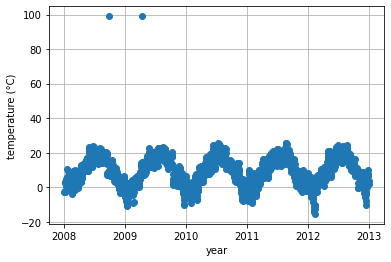

In [16]:
def g(x,a,b,c,d):
    return a*np.cos(2*np.pi*b*x + c) + d

mun_fit=curve_fit(g, x, y, p0=(20,1,0,10))[0]

plt.plot(x,y,"o")
plt.grid()
plt.xlabel('year')
plt.ylabel('temperature (°C)')
plt.show()


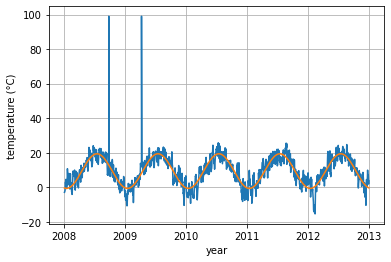

In [17]:
# fitted function
plt.plot(x, y)
plt.grid()
plt.xlabel('year')
plt.ylabel('temperature (°C)')
plt.plot(x, g(x, *mun_fit))


In [18]:
y1 = fsin(x, *mun_fit1)
y2 = g(x, *mun_fit)

# sum of squared residuals
ssr_1 = np.sum((y - y1)**2)
ndof_1 = 2 
ssr_2 = np.sum((y - y2)**2)
ndof_2 = 3 

print('RSS for fit for f(x):', int(ssr_1))
print('RSS for fit for g(X):', int(ssr_2))

RSS for fit for f(x): 40376
RSS for fit for g(X): 40375


In [19]:


def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

print("Test 3 vs 4 fitting parameters:")
cl_3_vs_4 = Ftest(ssr_1, ssr_2, ndof_1, ndof_2, df2.shape[0], verbose=True)

Test 3 vs 4 fitting parameters:
CL: 0.809 , additional parameter necessary: NO
